Adrians NoteBook

# Best Neighborhood in Pittsburgh – Sidewalk Walkability Metric

**Course:** CMPINF 0011  
**Team:** Team UHA  
**Author:** Adrian  

In this notebook, I analyzed the submetric of sidewalk walkability in Pittsburgh. I focused on how much sidewalk exists compared to how much street length there is in each census tract. My idea of the “best” area is a place that is easy and comfortable to walk around, so a higher amount of sidewalk per foot of street should mean better walkability.


Import pandas and matplot

In [4]:
# Basic imports
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import os

Reading sidewalk/street ratio

In [5]:
sidewalk = pd.read_csv("sidewalkstreetratiotract.csv")
sidewalk.head()


,Tract,SidewalkStepLFt,StreetLFt,Ratio
0,42003010300,78448.71321,74592.98738,1.051690192
1,42003020100,170043.96820,103496.13390,1.642998262
2,42003020300,92663.56238,107882.68170,0.858928986
3,42003030500,63741.19798,36574.88060,1.742758881
4,42003040200,46788.76395,31603.32982,1.480501081


The main columns I care about for this metric are:

- `SidewalkStepLFt`: the total sidewalk length in feet
- `StreetLFt`: the total street length in feet
- `Ratio`: sidewalk length divided by street length

Next, I want to make sure the `Ratio` column is treated as a number, and then sort the tracts from highest ratio to lowest. This will show me the tracts with the most sidewalk per foot of street.

In this section, I look at the distribution of the sidewalk-to-street ratio.
I want to see:

- Average ratio
- Which tracts have the highest ratios.
- Whether there are any extreme outliers.

In [8]:
sidewalk["Ratio"] = pd.to_numeric(sidewalk["Ratio"], errors="coerce")

best_tracts = sidewalk.sort_values("Ratio", ascending=False)
best_tracts.head(10)

,Tract,SidewalkStepLFt,StreetLFt,Ratio
11,42003050900,34060.43485,5125.794855,6.644908
401,42003982200,51352.28584,12695.022100,4.045073
399,42003981200,31844.77914,10014.352300,3.179914
388,42003980000,11466.92769,3707.451180,3.092941
13,42003051100,21923.74413,7265.428071,3.017543
88,42003260900,58729.59554,21650.722550,2.712593
12,42003051000,43118.82257,16923.273120,2.547901
363,42003561200,38381.61857,17396.215870,2.206320
25,42003080900,38603.78731,17756.642170,2.174048
43,42003120800,58309.53547,27154.436550,2.147330


Looking at the table helps, but i think its still a litte confusing. To compare the top areas, were gonna use a bar chart of the tracts with the highest sidewalk-to-street ratios.


<Figure size 1000x600 with 0 Axes>

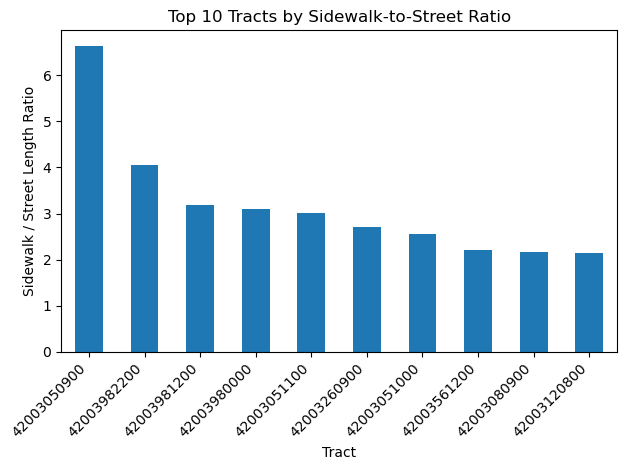

In [9]:
top_n = 10
top_tracts = best_tracts.head(top_n)

plt.figure(figsize=(10,6))
top_tracts.plot(
    x="Tract",
    y="Ratio",
    kind="bar",
    legend=False
)

plt.title(f"Top {top_n} Tracts by Sidewalk-to-Street Ratio")
plt.xlabel("Tract")
plt.ylabel("Sidewalk / Street Length Ratio")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

With this we can start to see and diffreentiate witch of these tracts have the highest sidewalk-street ratios. The sidewalks that are longer/wider mean its probably more pedestrian friendly. I looked up these tract IDs and their GeoIDs with the WPRDC neighborhood map tool. I saw a few neighborhoods i recognized like in Shadyside, South side Flats, and Downtown. Kinda confirming my data sets are coming from the right areas.

Lets track the top 5 and look them up.

In [13]:
best_tracts.head(5)[["Tract", "SidewalkStepLFt", "StreetLFt", "Ratio"]]

,Tract,SidewalkStepLFt,StreetLFt,Ratio
11,42003050900,34060.43485,5125.794855,6.644908
401,42003982200,51352.28584,12695.022100,4.045073
399,42003981200,31844.77914,10014.352300,3.179914
388,42003980000,11466.92769,3707.451180,3.092941
13,42003051100,21923.74413,7265.428071,3.017543


From the table above, the top 5 tracts by sidewalk/street ratio are:

- Tract 3050900 - Shadyside
- Tract 3982200 - Downtown (Central Buisness District)
- Tract 3981200 - Southside Flats (E Carson St area)
- Tract 3980000 - Southside Flats (West Side, Station Square/hillside base.)
- Tract 3051100 - Shadyside (North, borders Bloomfeild line and Baum / Centre corridor.)


Overall, this walkability metric says that the “best” areas in Pittsburgh for sidewalk walkability are the tracts with the highest sidewalk-to-street ratios. These places give people more space to walk, which can feel safer and more comfortable for everyday activities like commuting, exercising, or just exploring the city.

In my own experience, the neighborhoods that feel the nicest to walk through are the ones with the big sidwalks, and that walkable city type feel, so this metric lines up with how I already think about “good” neighborhoods. At the same time, walkability is only one part of what makes a neighborhood the best. My group members are looking at other factors like hills, crime, and parks/green space. 